In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [18]:
# Load the dataset
file_path = r"C:\Users\sayda\Downloads\archive (6)\credit_risk_dataset.csv"  
df = pd.read_csv(file_path)

# Display basic information
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [19]:
# Fill missing employment length values with the median
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)

# Fill missing loan interest rate values with the median
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

# Confirm no missing values remain
print(df.isnull().sum())


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [20]:
# List of categorical columns
categorical_cols = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]

# Encode categorical variables using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


In [21]:
# List of categorical columns
categorical_cols = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]

# Encode categorical variables using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


In [22]:
# Create new features
df["income_to_loan_ratio"] = df["person_income"] / df["loan_amnt"]
df["cred_hist_to_emp_length"] = df["cb_person_cred_hist_length"] / (df["person_emp_length"] + 1)  # Avoid division by zero

# Display updated dataset
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,income_to_loan_ratio,cred_hist_to_emp_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3,1.685714,0.024194
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2,9.600000,0.333333
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3,1.745455,1.500000
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2,1.871429,0.400000
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4,1.554286,0.444444


In [23]:
# Define features (X) and target variable (y)
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((26064, 13), (6517, 13), (26064,), (6517,))

In [24]:
# Standardizing numerical features to improve model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]  # Get probability of default


In [26]:
# Model evaluation using confusion matrix, classification report, and ROC-AUC score
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
print("\nROC-AUC Score:", roc_auc)


Confusion Matrix:
 [[5049   46]
 [ 430  992]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      5095
           1       0.96      0.70      0.81      1422

    accuracy                           0.93      6517
   macro avg       0.94      0.84      0.88      6517
weighted avg       0.93      0.93      0.92      6517


ROC-AUC Score: 0.9254022379294116


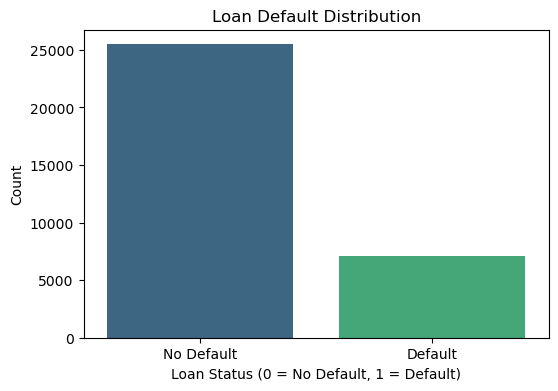

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["loan_status"], palette="viridis")
plt.title("Loan Default Distribution")
plt.xlabel("Loan Status (0 = No Default, 1 = Default)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No Default", "Default"])
plt.show()


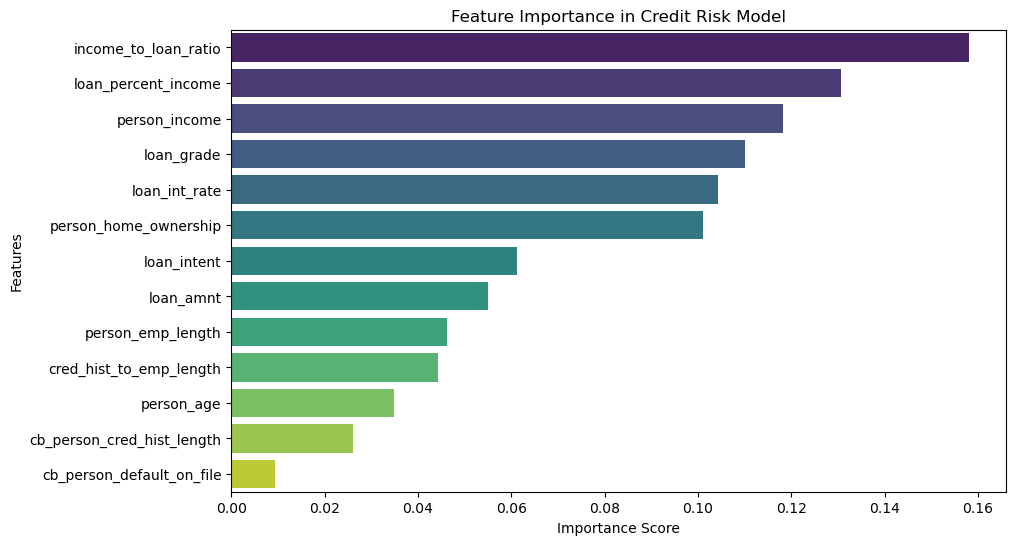

In [28]:
# Extract feature importance from the trained model
importances = rf_model.feature_importances_
feature_names = X.columns
feat_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_importance_df = feat_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance_df["Importance"], y=feat_importance_df["Feature"], palette="viridis")
plt.title("Feature Importance in Credit Risk Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
